In [1]:
import os, cv2, itertools
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

#!pip install np_utils

from keras.utils.np_utils import to_categorical

from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout

from sklearn.utils import shuffle

#!pip install sklearn
import sklearn
from sklearn.model_selection import train_test_split

In [2]:
TRAIN_DIR = './train/'
TEST_DIR = './test/'

ROWS = 64
COLS = 64
CHANNELS = 3

In [3]:
train_images = [TRAIN_DIR+i for i in os.listdir(TRAIN_DIR)]
test_images = [TEST_DIR+i for i in os.listdir(TEST_DIR)]

In [4]:
def read_image(file_path):
  #print(file_path)
  img = cv2.imread(file_path, cv2.IMREAD_COLOR)
  #print(img)
  return cv2.resize(img, (ROWS, COLS), interpolation=cv2.INTER_CUBIC)

In [5]:

def prep_data(images):
  m = len(images)
  n_x = ROWS*COLS*CHANNELS
  
  X = np.ndarray((m,ROWS,COLS,CHANNELS), dtype=np.uint8)
  y = np.zeros((m,1))
  print("X.shape is {}".format(X.shape))
  
  for i,image_file in enumerate(images) :
    image = read_image(image_file)
    X[i,:] = np.squeeze(image.reshape((ROWS, COLS, CHANNELS)))
    if 'dog' in image_file.lower() :
      y[i,0] = 1
    elif 'cat' in image_file.lower() :
      y[i,0] = 0
    else : # for test data
      y[i,0] = image_file.split('/')[-1].split('.')[0]
      
    if i%5000 == 0 :
      print("Proceed {} of {}".format(i, m))
    
  return X,y

In [6]:
X_train, y_train = prep_data(train_images)
X_test, test_idx = prep_data(test_images)


X.shape is (25000, 64, 64, 3)
Proceed 0 of 25000
Proceed 5000 of 25000
Proceed 10000 of 25000
Proceed 15000 of 25000
Proceed 20000 of 25000
X.shape is (12500, 64, 64, 3)
Proceed 0 of 12500
Proceed 5000 of 12500
Proceed 10000 of 12500


In [7]:
print("Train shape: {}".format(X_train.shape))
print("Test shape: {}".format(X_test.shape))

Train shape: (25000, 64, 64, 3)
Test shape: (12500, 64, 64, 3)


In [8]:
X, y = shuffle(X_train, y_train)

In [14]:
classes = {0: 'cat',
           1: 'dog'}

In [15]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=1)

print("Train shape: {}".format(X_train.shape))
print("Train label shape: {}".format(y_train.shape))
print("Validation shape: {}".format(X_val.shape))
print("Validation label shape: {}".format(y_val.shape))

Train shape: (20000, 64, 64, 3)
Train label shape: (20000, 1)
Validation shape: (5000, 64, 64, 3)
Validation label shape: (5000, 1)


In [16]:

y_train_one_hot = to_categorical(y_train)
print(y_train_one_hot.shape)

num_classes = y_train_one_hot.shape[1]
print(num_classes)

y_val_one_hot = to_categorical(y_val)
print(y_val_one_hot.shape)

(20000, 2)
2
(5000, 2)


In [17]:
def show_images(X, y, idx) :
  image = X[idx]
  #image = image.reshape((ROWS, COLS, CHANNELS))
  plt.figure(figsize=(4,2))
  plt.imshow(image)
  plt.title("It is a {}".format(classes[y[idx,0]]))
  plt.show()

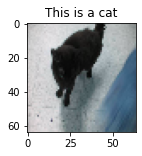

In [18]:
show_images(X_train, y_train, 0)

In [19]:
X_val_norm = X_val / 255

In [1]:
X_train_norm = X_train / 255

NameError: name 'X_train' is not defined

In [23]:
model = Sequential()

model.add(Conv2D(32, (3,3), input_shape=(ROWS, COLS, CHANNELS), activation='relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, (1,1), activation='relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(1024, (1,1), activation='relu'))
#model.add(MaxPooling2D(pool_size = (2,2)))
#model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dropout(0.4))

model.add(Dense(units=120, activation='relu'))
model.add(Dense(units=2, activation='sigmoid'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 29, 29, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 12, 12, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 6, 6, 128)        

In [24]:
model.fit(X_train, y_train_one_hot, validation_data=(X_val, y_val_one_hot), epochs=5, batch_size = 64)
#model.fit(X_train_norm, y_train_one_hot, validation_data=(X_val_norm, y_val_one_hot), epochs=50, batch_size = 64)

Epoch 1/5
313/313 [==============================] - 180s 576ms/step - loss: 0.7151 - accuracy: 0.5025 - val_loss: 0.6931 - val_accuracy: 0.4906
Epoch 2/5
313/313 [==============================] - 214s 685ms/step - loss: 0.6931 - accuracy: 0.5023 - val_loss: 0.6931 - val_accuracy: 0.4906
Epoch 3/5
313/313 [==============================] - 184s 589ms/step - loss: 0.6931 - accuracy: 0.5023 - val_loss: 0.6931 - val_accuracy: 0.4906
Epoch 4/5
313/313 [==============================] - 175s 560ms/step - loss: 0.6931 - accuracy: 0.5023 - val_loss: 0.6931 - val_accuracy: 0.4906
Epoch 5/5
313/313 [==============================] - 177s 566ms/step - loss: 0.6931 - accuracy: 0.5023 - val_loss: 0.6931 - val_accuracy: 0.4906


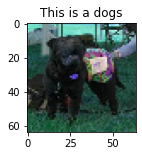

Our Model Prediction: [0]


In [25]:
image = X_train[0]
test_pred = model.predict_classes(image.reshape(1, 64, 64, 3))

show_images(X_train, y_train,0)

print("Our Model Prediction: {}".format(test_pred))

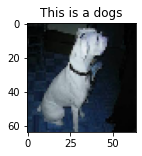

Our Model Prediction: [0]


In [26]:
image = X_train[100]
test_pred = model.predict_classes(image.reshape(1, 64, 64, 3))

show_images(X_train, y_train,100)

print("Our Model Prediction: {}".format(test_pred))

In [2]:
def show_image_prediction(X, idx, model) :
  image = X[idx].reshape(1,64,64,3)
  image_class = classes[model.predict_classes(image).item()]
  image = image.reshape((ROWS, COLS, CHANNELS))
  plt.figure(figsize = (4,2))
  plt.imshow(image)
  plt.title("Test {} : It is a  {}".format(idx, image_class))
  plt.show()

In [3]:
X_test_lr, test_idx = X_test, test_idx

for i in np.random.randint(0, len(X_test_lr), 10) :
  show_image_prediction(X_test_lr, i, model)

NameError: name 'X_test' is not defined